In [1]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns 

In [70]:
def obtener_tablas_mysql(host, usuario, contraseña, base_datos):
    # Crear la cadena de conexión a la base de datos
    cadena_conexion = f"mysql+pymysql://{usuario}:{contraseña}@{host}/{base_datos}"

    # Crear el motor de conexión a la base de datos
    motor = create_engine(cadena_conexion)

    # Crear el objeto Inspector
    inspector = inspect(motor)

    # Obtener los nombres de todas las tablas en la base de datos
    nombres_tablas = inspector.get_table_names()

    orden_tablas = ['feb23', 'mar23', 'abr23','may23','jun23','jul23','ago23','sep23','oct23','nov23','dic23','ene24']
    # Almacenar los DataFrames correspondientes a cada tabla en un diccionario
    diccionario_tablas = {}
    for nombre_tabla in orden_tablas:
        query = f"SELECT * FROM {nombre_tabla}"
        df = pd.read_sql(query, con=motor)
        diccionario_tablas[nombre_tabla] = df

    return diccionario_tablas



In [71]:
# definimos las variables con los datos de mysql
host = "localhost"
usuario = "root"
contraseña = "joshua"
base_datos = "bikes_bd"

diccionario_tablas = obtener_tablas_mysql(host, usuario, contraseña, base_datos)

# Imprimir las primeras filas de cada DataFrame
for nombre_tabla, df in diccionario_tablas.items():
    print(f"Tabla: {nombre_tabla}")
    print(df.head())
    print("\n")

Tabla: feb23
            ride_id  rideable_type          started_at            ended_at  \
0  CBCD0D7777F0E45F   classic_bike 2023-02-14 11:59:42 2023-02-14 12:13:38   
1  F3EC5FCE5FF39DE9  electric_bike 2023-02-15 13:53:48 2023-02-15 13:59:08   
2  E54C1F27FA9354FF   classic_bike 2023-02-19 11:10:57 2023-02-19 11:35:01   
3  3D561E04F739CC45  electric_bike 2023-02-26 16:12:05 2023-02-26 16:39:55   
4  0CB4B4D53B2DBE05  electric_bike 2023-02-20 11:55:23 2023-02-20 12:05:48   

             start_station_name start_station_id  \
0  Southport Ave & Clybourn Ave     TA1309000030   
1    Clarendon Ave & Gordon Ter            13379   
2  Southport Ave & Clybourn Ave     TA1309000030   
3  Southport Ave & Clybourn Ave     TA1309000030   
4   Prairie Ave & Garfield Blvd     TA1307000160   

                end_station_name end_station_id  start_lat  start_lng  \
0         Clark St & Schiller St   TA1309000024  41.920771 -87.663712   
1     Sheridan Rd & Lawrence Ave   TA1309000041  41.957879 

In [72]:
# Iterar sobre cada tabla en el diccionario y llamar al método info()
for nombre_tabla, df in diccionario_tablas.items():
    print(f"Información de la tabla: {nombre_tabla}")
    print(df.info())
    print("\n")


Información de la tabla: feb23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149560 entries, 0 to 149559
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype          
---  ------              --------------   -----          
 0   ride_id             149560 non-null  object         
 1   rideable_type       149560 non-null  object         
 2   started_at          149560 non-null  datetime64[ns] 
 3   ended_at            149560 non-null  datetime64[ns] 
 4   start_station_name  149560 non-null  object         
 5   start_station_id    149560 non-null  object         
 6   end_station_name    149560 non-null  object         
 7   end_station_id      149560 non-null  object         
 8   start_lat           149560 non-null  float64        
 9   start_lng           149560 non-null  float64        
 10  end_lat             149560 non-null  float64        
 11  end_lng             149560 non-null  float64        
 12  member_casual       149560 non-null  object         
 13  ride_time     

Revisando la informacion de cada una de las tablas, se encuentra que hay que modificar los Dtypes de las columnas para poder realizar un analisis correcto de cada una de ellas 

In [73]:
# Definir los nuevos tipos de datos deseados para cada tabla y cada columna
nuevos_tipos_de_datos = {
    'feb23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'mar23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'abr23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'may23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'jun23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'jul23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'ago23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'sep23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'oct23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'nov23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'dic23': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    'ene24': {'rideable_type': 'category', 'start_station_name': 'category','start_station_id':'category','end_station_name': 'category','end_station_id':'category', 'member_casual':'category'},
    
}

# Iterar sobre cada tabla en el diccionario y cambiar los tipos de datos de las columnas
for nombre_tabla, df in diccionario_tablas.items():
    if nombre_tabla in nuevos_tipos_de_datos:
        tipos_de_datos_por_columna = nuevos_tipos_de_datos[nombre_tabla]
        for columna, nuevo_tipo in tipos_de_datos_por_columna.items():
            df[columna] = df[columna].astype(nuevo_tipo)

# Verificar los cambios
for nombre_tabla, df in diccionario_tablas.items():
    print(f"Tabla: {nombre_tabla}")
    print(df.dtypes)
    print("\n")

Tabla: feb23
ride_id                        object
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name           category
start_station_id             category
end_station_name             category
end_station_id               category
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                category
ride_time             timedelta64[ns]
distance_km                   float64
dtype: object


Tabla: mar23
ride_id                        object
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name           category
start_station_id             category
end_station_name             category
end_station_id               category
start_lat                     float64
start_lng                     float64
end_lat 

In [74]:
# obtenemos el resumen estadistico de cada una de las tablas 
for nombre_tabla, df in diccionario_tablas.items():
    print(f"Información de la tabla: {nombre_tabla}")
    print(df.describe())
    print("\n")

Información de la tabla: feb23


                          started_at                       ended_at  \
count                         149560                         149560   
mean   2023-02-15 13:48:29.830696960  2023-02-15 14:00:30.484507904   
min              2023-02-01 00:03:23            2023-02-01 00:08:42   
25%    2023-02-08 18:39:16.750000128            2023-02-08 18:50:12   
50%       2023-02-14 18:28:03.500000     2023-02-14 18:38:16.500000   
75%       2023-02-21 18:54:50.500000     2023-02-21 19:05:38.500000   
max              2023-02-28 23:59:31            2023-03-01 09:48:38   
std                              NaN                            NaN   

           start_lat      start_lng        end_lat        end_lng  \
count  149560.000000  149560.000000  149560.000000  149560.000000   
mean       41.897033     -87.645118      41.897372     -87.645262   
min        41.648501     -87.830000      41.648501     -87.830000   
25%        41.878166     -87.658416      41.878317     -87.658617   
50%        41.8

In [75]:
# calculamos el promedio de km recorridos en cada mes 
for nombre_tabla, df in diccionario_tablas.items():
    print(f"promedio de km recorridos en: {nombre_tabla}")
    print(df['distance_km'].mean())
    print("\n")

promedio de km recorridos en: feb23
1.7668939697633887


promedio de km recorridos en: mar23
1.8072705158018638


promedio de km recorridos en: abr23
2.0244976178713205


promedio de km recorridos en: may23
2.1581250187554186


promedio de km recorridos en: jun23
2.237503937601762


promedio de km recorridos en: jul23
2.179968701014933


promedio de km recorridos en: ago23
2.1630735086335315


promedio de km recorridos en: sep23
2.1124554311964143


promedio de km recorridos en: oct23
1.9891443777307862


promedio de km recorridos en: nov23
1.8909767888130544


promedio de km recorridos en: dic23
1.808969744591437


promedio de km recorridos en: ene24
1.6751146693780419




In [76]:
# calculamos el numero de personas que estan dentro de los outliers para un mejor analisis
for nombre_tabla, df in diccionario_tablas.items():
    # Calcular los cuartiles
    Q1 = df['distance_km'].quantile(0.25).round(2)
    Q3 = df['distance_km'].quantile(0.75).round(2)

    # Calcular las personas que viajaron más o menos del percentil 25 y 75
    otl_max = (df['distance_km'] >= Q3).sum()
    otl_min = (df['distance_km'] < Q1).sum()

    print(f"Tabla: {nombre_tabla}")
    print(f"{otl_max} personas que viajaron más de {Q3} km")
    print(f"{otl_min} personas que viajaron menos de {Q1} km")
    print("\n")

Tabla: feb23
37294 personas que viajaron más de 2.22 km
37065 personas que viajaron menos de 0.77 km


Tabla: mar23
50044 personas que viajaron más de 2.3 km
49677 personas que viajaron menos de 0.8 km


Tabla: abr23
80988 personas que viajaron más de 2.63 km
81312 personas que viajaron menos de 0.85 km




Tabla: may23
115512 personas que viajaron más de 2.86 km
115292 personas que viajaron menos de 0.89 km


Tabla: jun23
133895 personas que viajaron más de 2.9 km
133317 personas que viajaron menos de 0.93 km


Tabla: jul23
143155 personas que viajaron más de 2.88 km
143535 personas que viajaron menos de 0.91 km


Tabla: ago23
145978 personas que viajaron más de 2.84 km
146087 personas que viajaron menos de 0.9 km


Tabla: sep23
126525 personas que viajaron más de 2.76 km
126028 personas que viajaron menos de 0.88 km


Tabla: oct23
101113 personas que viajaron más de 2.55 km
101795 personas que viajaron menos de 0.86 km


Tabla: nov23
68570 personas que viajaron más de 2.4 km
68305 personas que viajaron menos de 0.83 km


Tabla: dic23
41604 personas que viajaron más de 2.3 km
42175 personas que viajaron menos de 0.82 km


Tabla: ene24
28386 personas que viajaron más de 2.08 km
28176 personas que viajaron menos de 0.76 km




In [77]:
import geopandas as gpd
from shapely.geometry import Point
import plotly.express as px

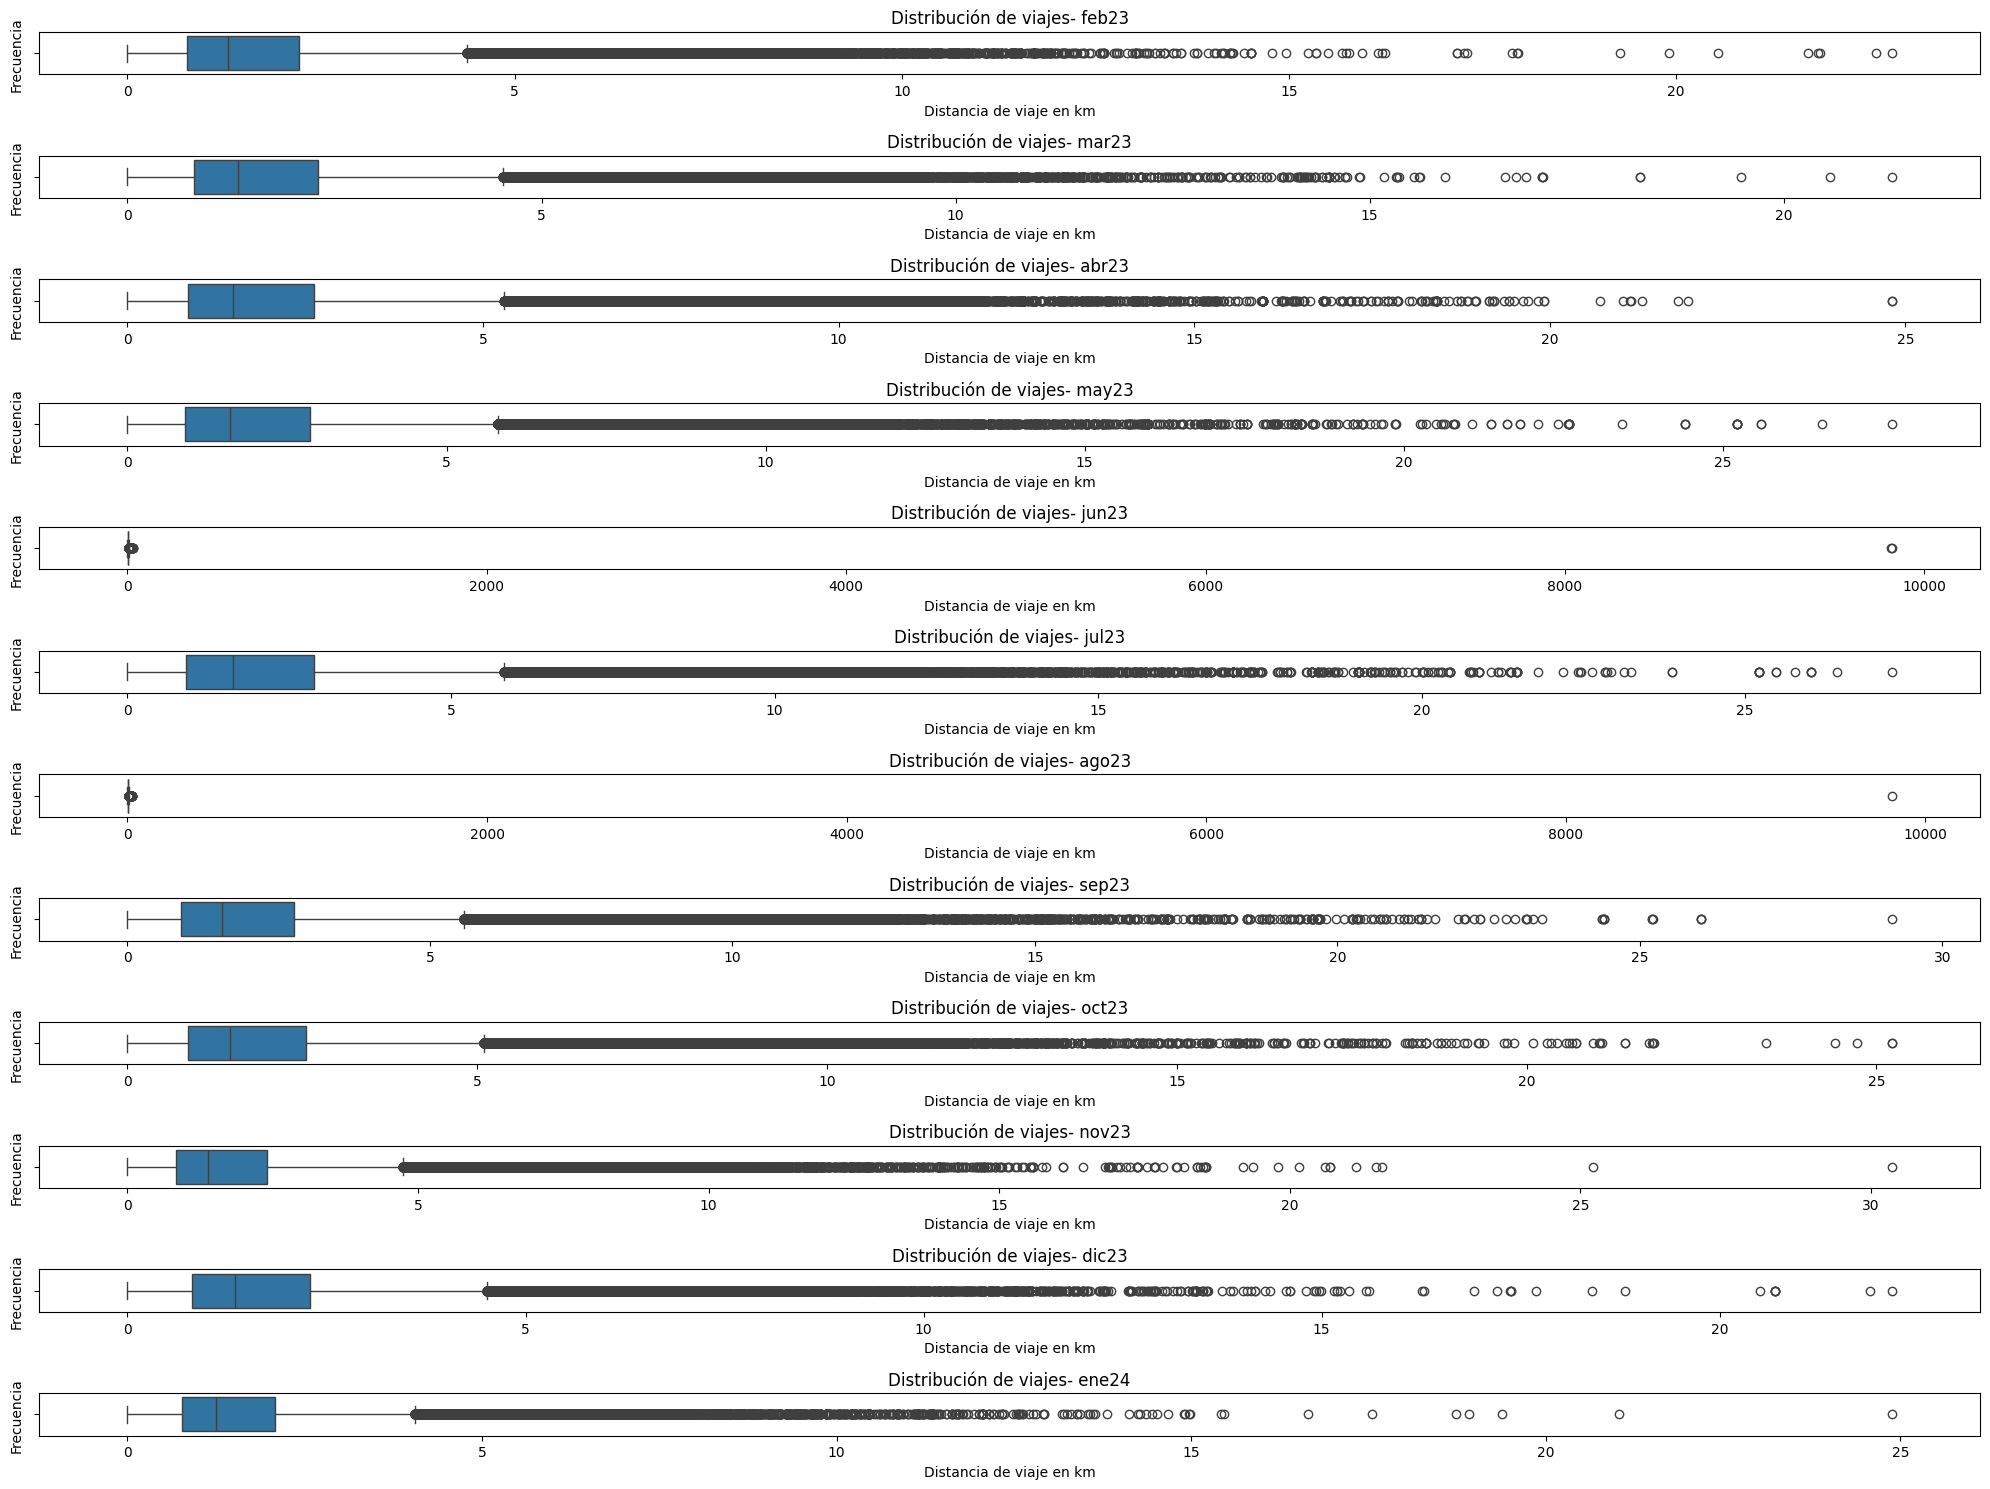

In [78]:
# Creamos una sola figura para todos los boxplots
fig, axs = plt.subplots(nrows=len(diccionario_tablas), figsize=(20, 15))

# Iteramos sobre cada tabla y su índice en el diccionario
for i, (nombre_tabla, df) in enumerate(diccionario_tablas.items()):
    # Gráfico con outliers
    sns.boxplot(x=df['distance_km'], ax=axs[i])
    axs[i].set_title(f'Distribución de viajes- {nombre_tabla}')
    axs[i].set_xlabel('Distancia de viaje en km')
    axs[i].set_ylabel('Frecuencia')

# Ajustamos el espaciado entre los subplots
plt.tight_layout()
plt.show()

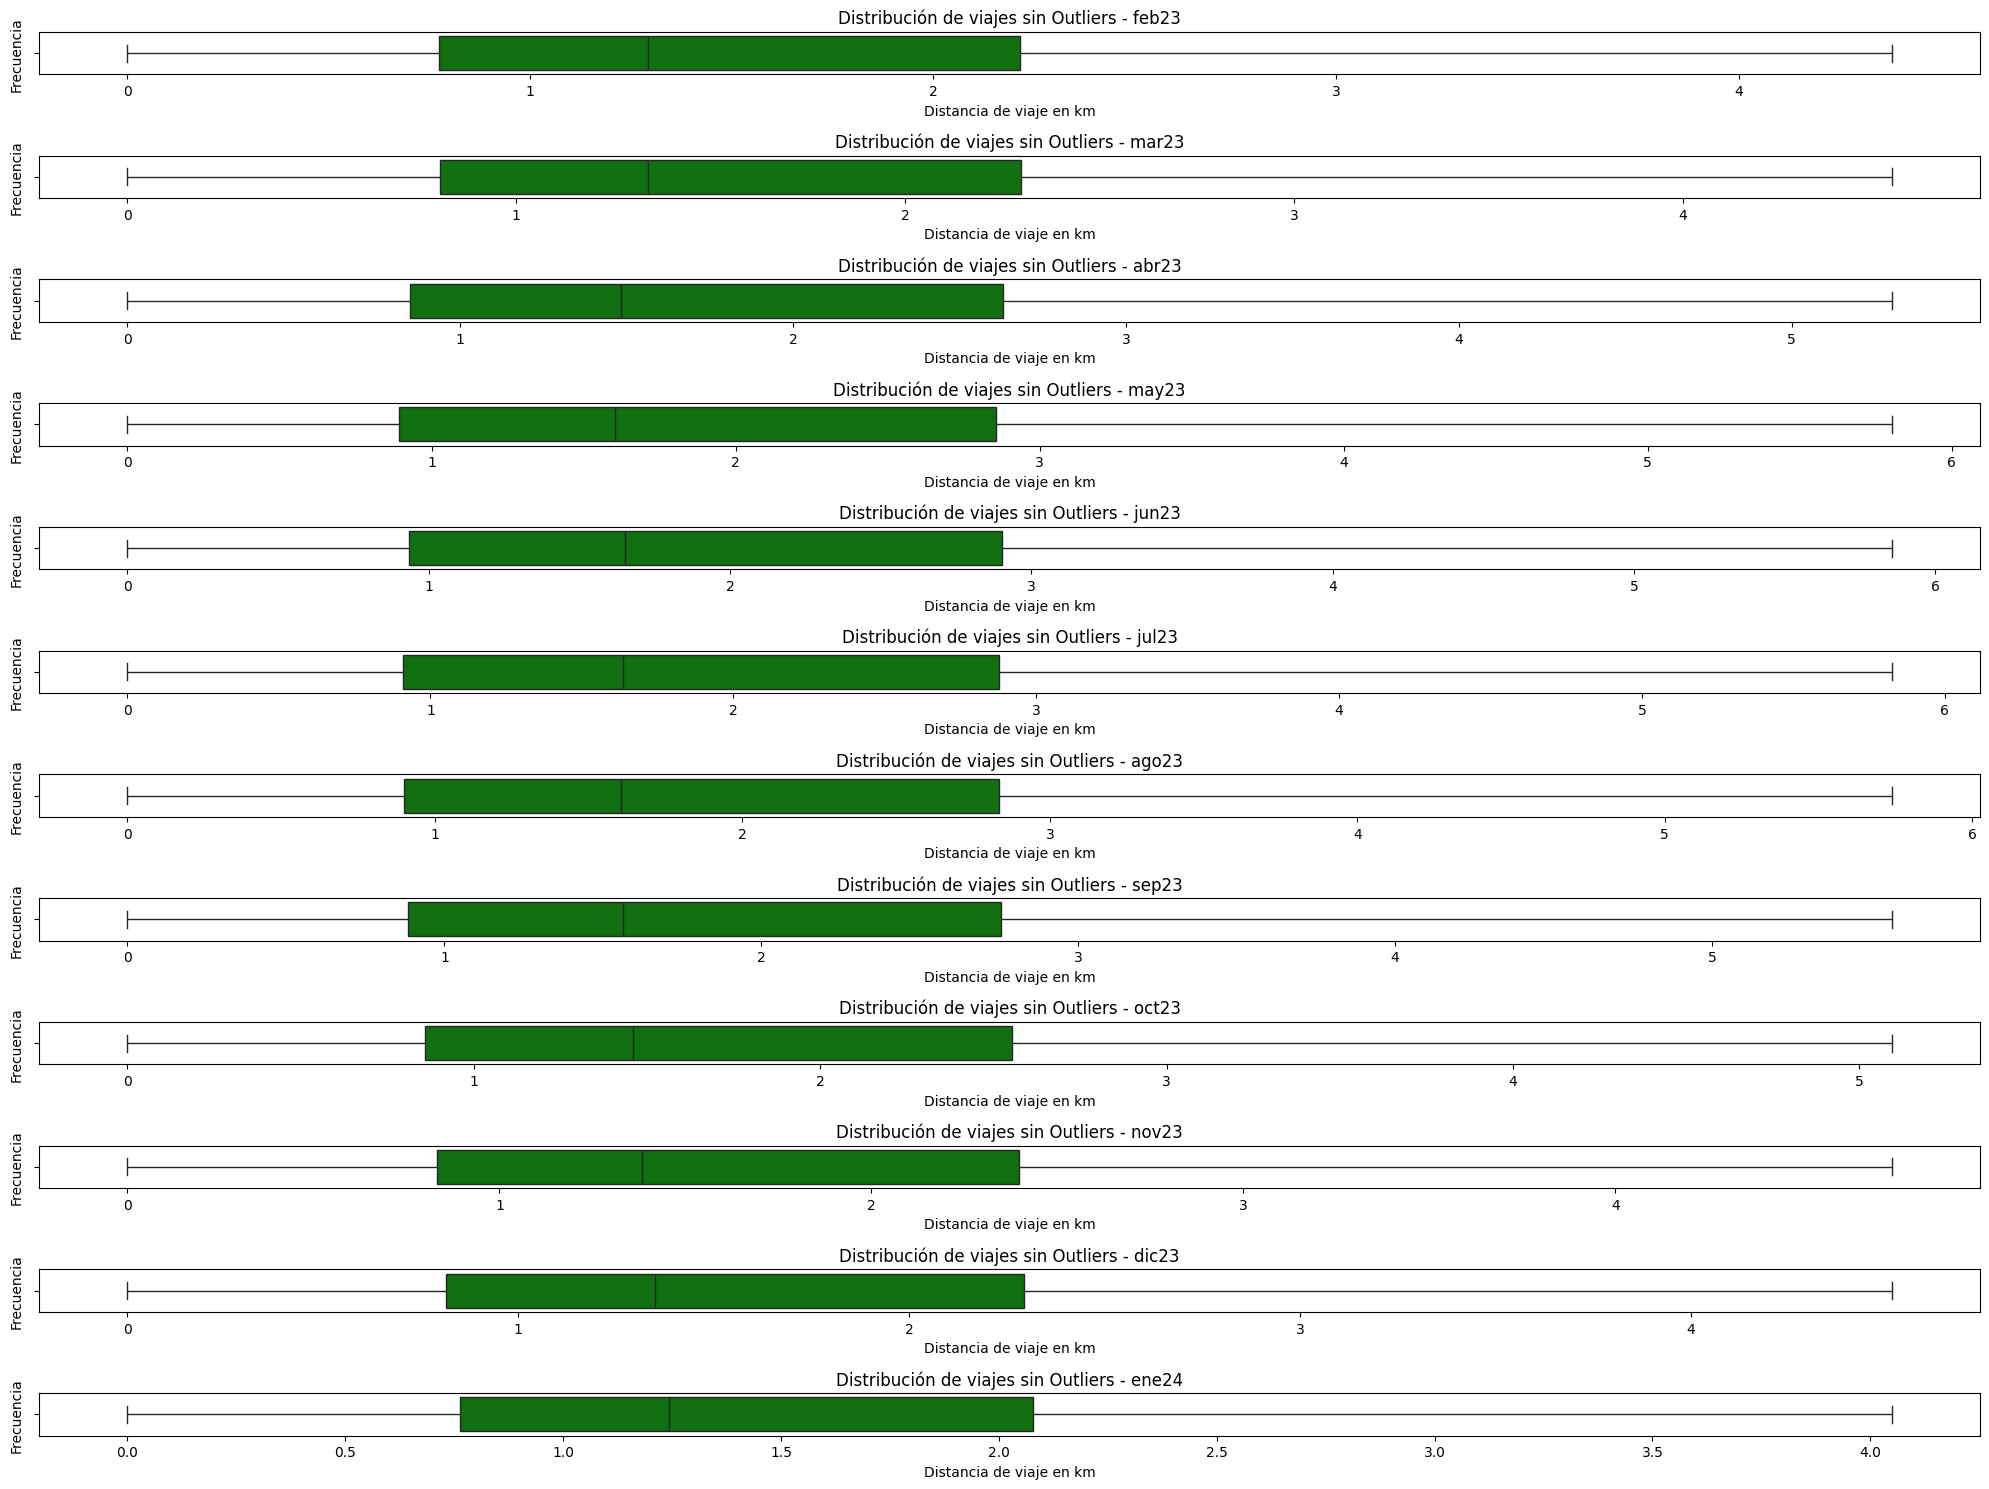

In [79]:
# Creamos una sola figura para todos los boxplots
fig, axs = plt.subplots(nrows=len(diccionario_tablas), figsize=(20, 15))

# Iteramos sobre cada tabla y su índice en el diccionario
for i, (nombre_tabla, df) in enumerate(diccionario_tablas.items()):
    # Gráfico con outliers
    sns.boxplot(x=df['distance_km'], showfliers=False, ax=axs[i],color='green')
    axs[i].set_title(f'Distribución de viajes sin Outliers - {nombre_tabla}')
    axs[i].set_xlabel('Distancia de viaje en km')
    axs[i].set_ylabel('Frecuencia')

# Ajustamos el espaciado entre los subplots
plt.tight_layout()
plt.show()

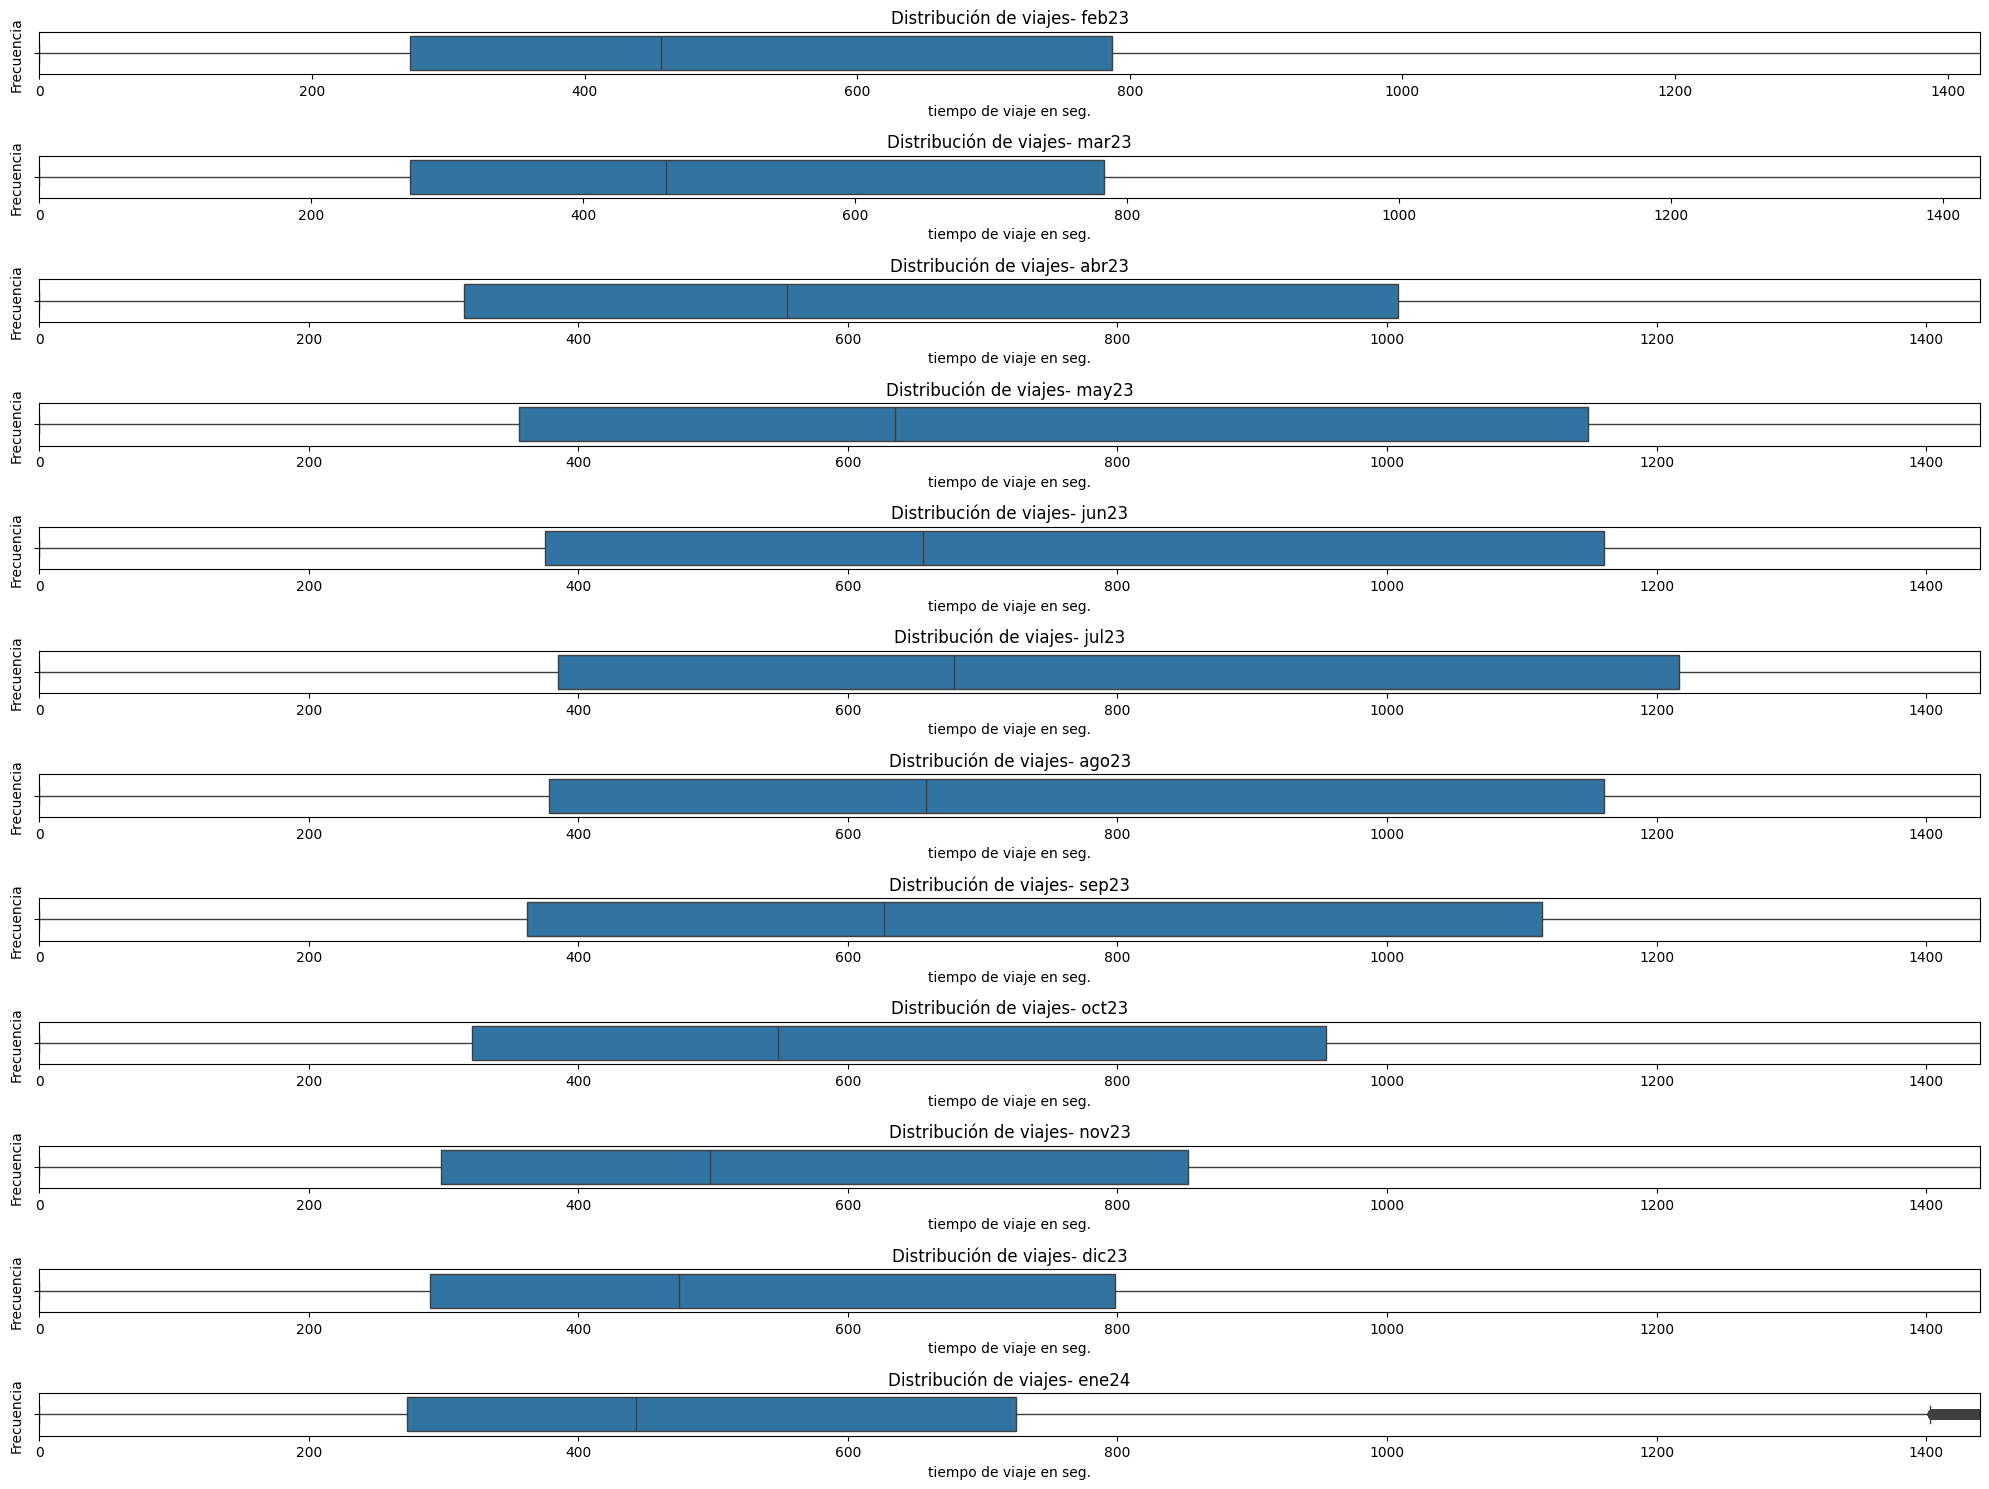

In [80]:
# Creamos una sola figura para todos los boxplots
fig, axs = plt.subplots(nrows=len(diccionario_tablas), figsize=(20, 15))

# Iteramos sobre cada tabla y su índice en el diccionario
for i, (nombre_tabla, df) in enumerate(diccionario_tablas.items()):
    # Gráfico con outliers
    sns.boxplot(x=df['ride_time'].dt.total_seconds(), ax=axs[i])
    axs[i].set_title(f'Distribución de viajes- {nombre_tabla}')
    axs[i].set_xlabel('tiempo de viaje en seg.')
    axs[i].set_ylabel('Frecuencia')
    # Establecer límites del eje x
    max_tiempo = df['ride_time'].dt.total_seconds().max() / 60 
    axs[i].set_xlim(0, max_tiempo)
# Ajustamos el espaciado entre los subplots
plt.tight_layout()
plt.show()

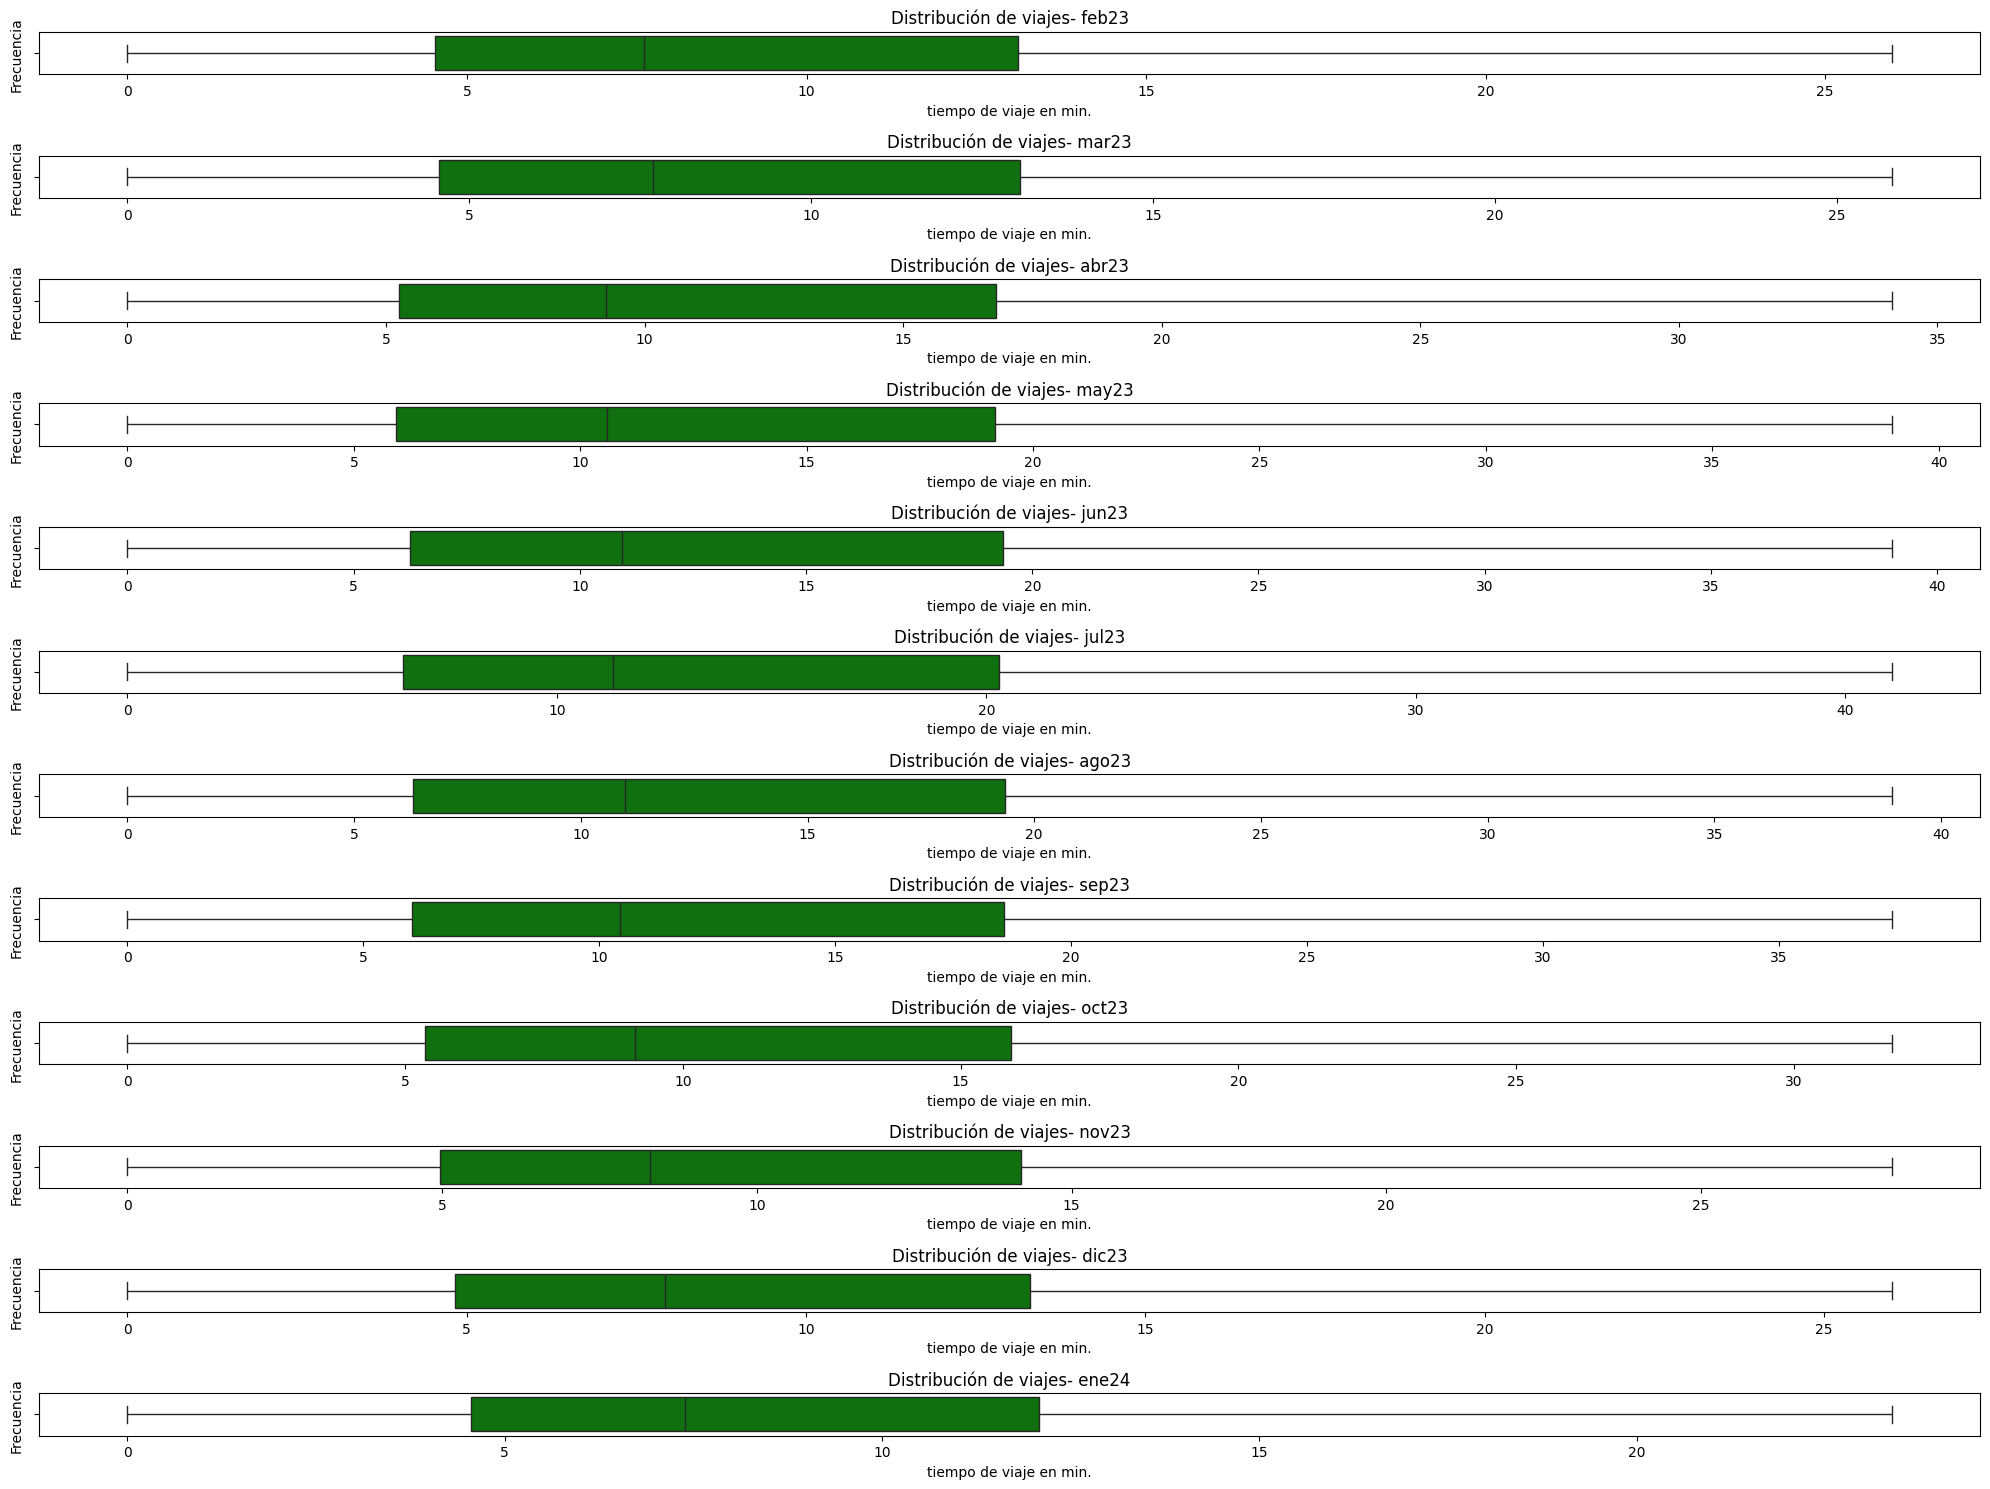

In [81]:
# Creamos una sola figura para todos los boxplots
fig, axs = plt.subplots(nrows=len(diccionario_tablas), figsize=(20, 15))

# Iteramos sobre cada tabla y su índice en el diccionario
for i, (nombre_tabla, df) in enumerate(diccionario_tablas.items()):
    # Gráfico sin outliers
    sns.boxplot(x=df['ride_time'].dt.total_seconds() / 60, showfliers=False, ax=axs[i],color='green')
    axs[i].set_title(f'Distribución de viajes- {nombre_tabla}')
    axs[i].set_xlabel('tiempo de viaje en min.')
    axs[i].set_ylabel('Frecuencia')
# Ajustamos el espaciado entre los subplots
plt.tight_layout()
plt.show()

In [82]:
# calculamos el numero de personas que estan dentro de los outliers para un mejor analisis
for nombre_tabla, df in diccionario_tablas.items():
    # Calcular el tiempo máximo y mínimo para esta tabla
    tiempo_maximo = df['ride_time'].quantile(0.75)
    tiempo_minimo = df['ride_time'].quantile(0.25)

    # Calcular las personas que viajaron más o menos del tiempo máximo y mínimo
    otl_timemax = (df['ride_time'] > tiempo_maximo).sum()
    otl_timemin = (df['ride_time'] < tiempo_minimo).sum()

    print(f"Tabla: {nombre_tabla}")
    print(f"{otl_timemax} personas que viajaron más de {tiempo_maximo} mins por viaje en: {nombre_tabla[:3]}")
    print(f"{otl_timemin} personas que viajaron menos de {tiempo_minimo} mins por viaje en: {nombre_tabla[:3]}")
    print("\n")

Tabla: feb23
37345 personas que viajaron más de 0 days 00:13:07 mins por viaje en: feb
37157 personas que viajaron menos de 0 days 00:04:32 mins por viaje en: feb


Tabla: mar23
50050 personas que viajaron más de 0 days 00:13:03 mins por viaje en: mar
49868 personas que viajaron menos de 0 days 00:04:33 mins por viaje en: mar




Tabla: abr23
81016 personas que viajaron más de 0 days 00:16:48 mins por viaje en: abr
81038 personas que viajaron menos de 0 days 00:05:15 mins por viaje en: abr


Tabla: may23
115765 personas que viajaron más de 0 days 00:19:09 mins por viaje en: may
115368 personas que viajaron menos de 0 days 00:05:56 mins por viaje en: may


Tabla: jun23
133639 personas que viajaron más de 0 days 00:19:21 mins por viaje en: jun
133334 personas que viajaron menos de 0 days 00:06:15 mins por viaje en: jun


Tabla: jul23
143449 personas que viajaron más de 0 days 00:20:17 mins por viaje en: jul
143121 personas que viajaron menos de 0 days 00:06:25 mins por viaje en: jul


Tabla: ago23
146191 personas que viajaron más de 0 days 00:19:21 mins por viaje en: ago
146166 personas que viajaron menos de 0 days 00:06:18 mins por viaje en: ago


Tabla: sep23
126568 personas que viajaron más de 0 days 00:18:35 mins por viaje en: sep
126611 personas que viajaron menos de 0 days 00:06:02 mins por viaje en: sep




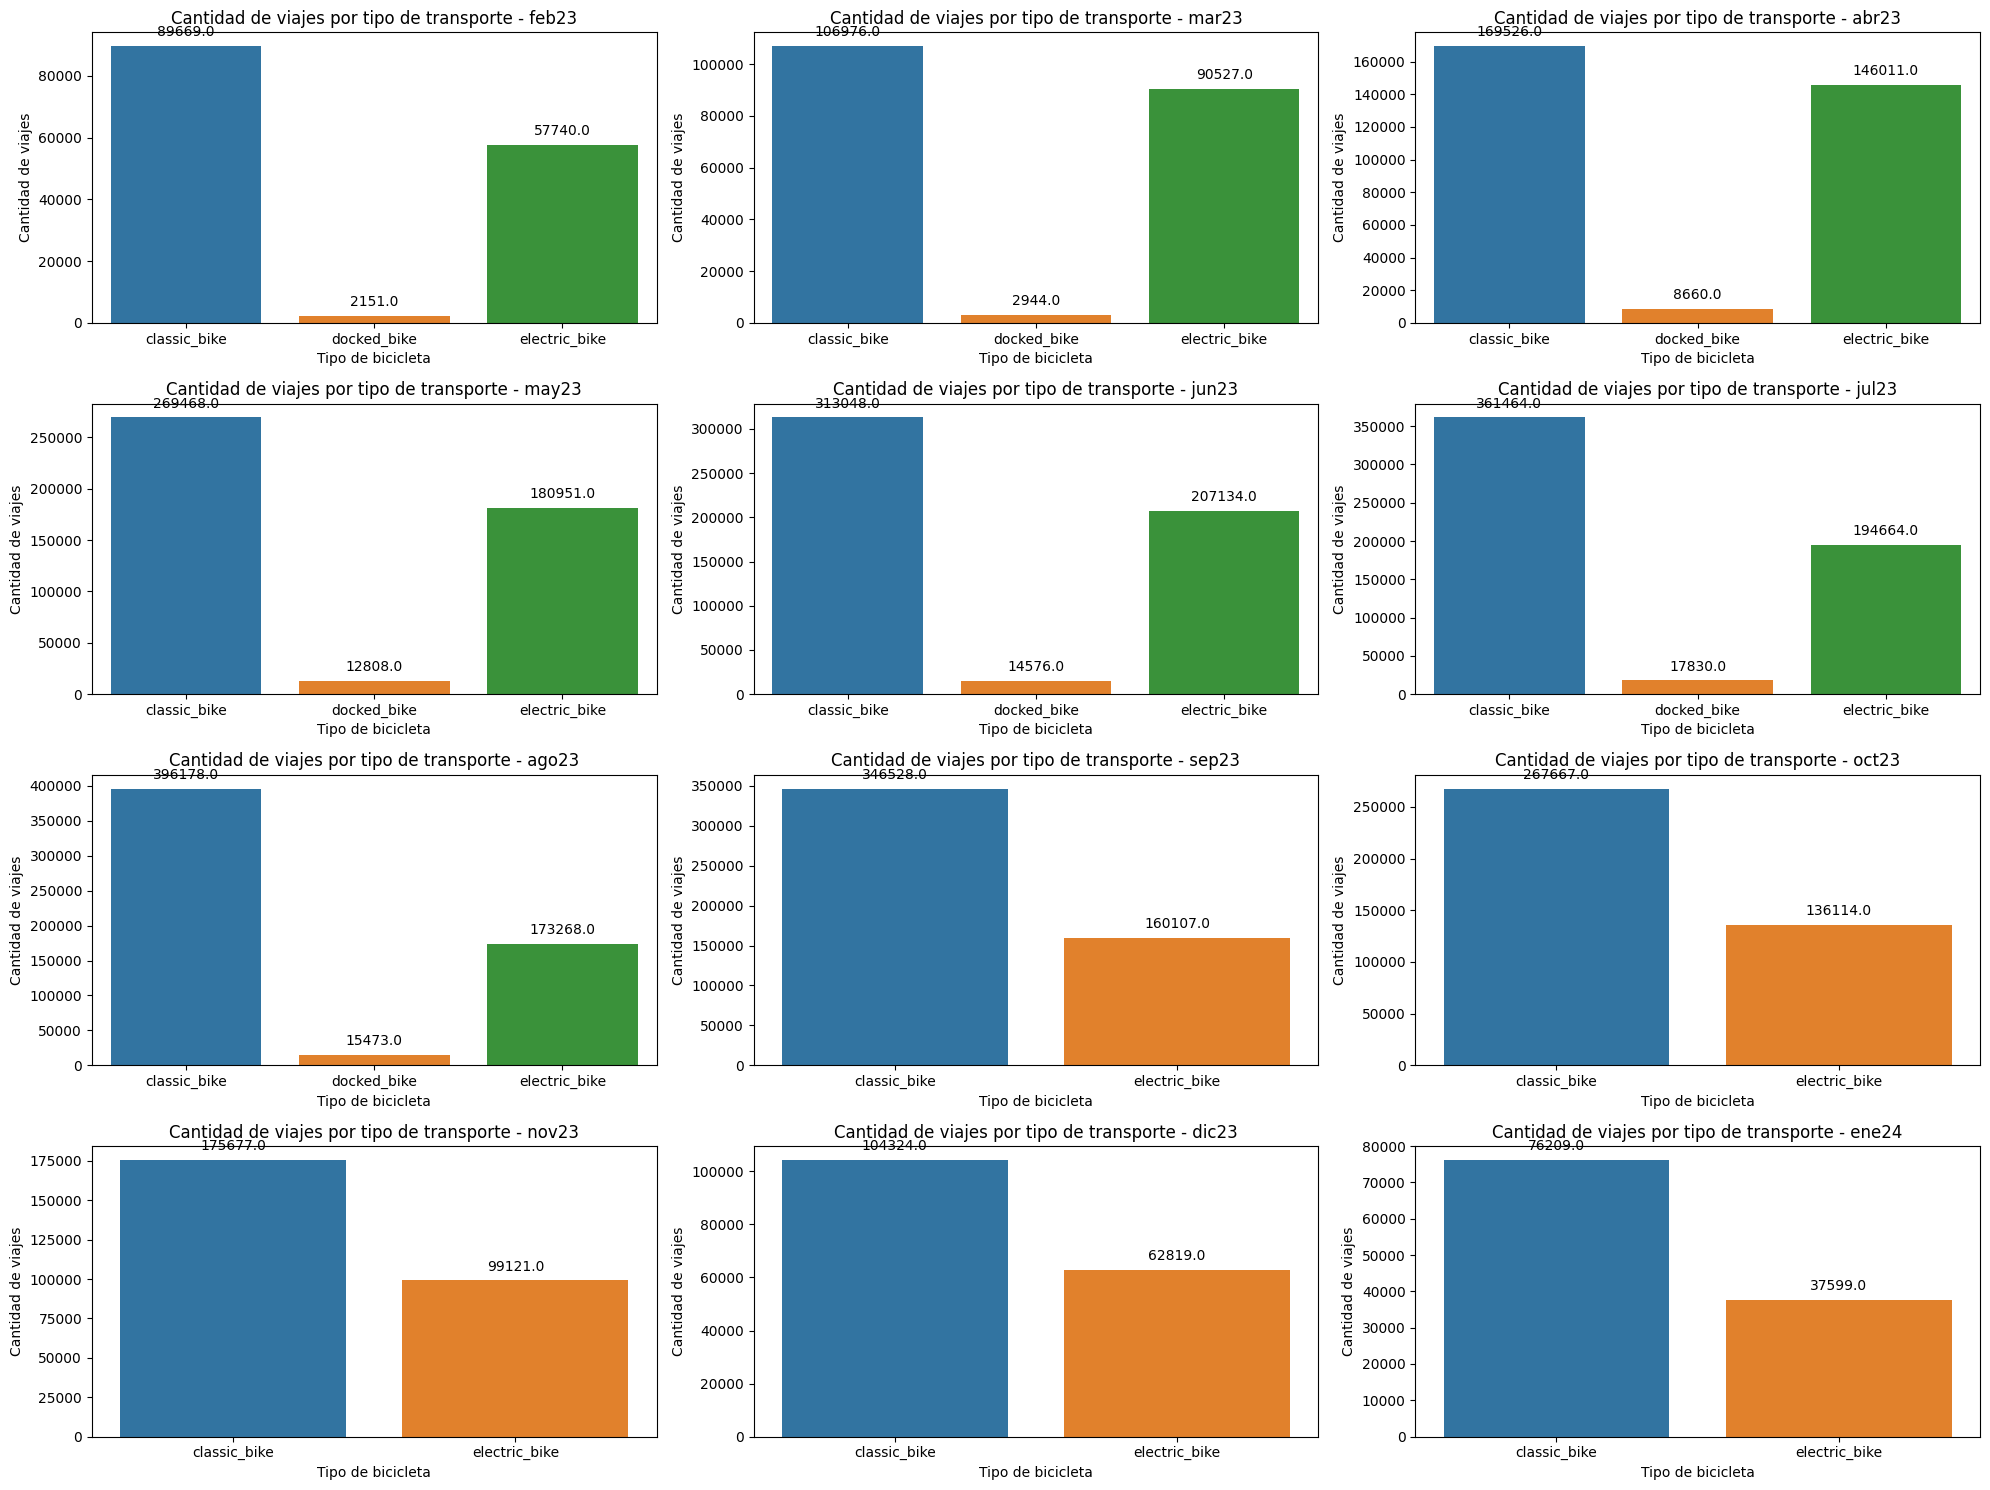

In [83]:
# Calculamos el número total de tablas para ajustar las filas y columnas de subplots
num_filas = (len(diccionario_tablas) + 2) // 3
num_columnas = min(len(diccionario_tablas), 3)

# Creamos una sola figura con múltiples subplots para todos los gráficos
fig, axs = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(20, 15))

# Iteramos sobre cada tabla y su índice en el diccionario
for i, (nombre_tabla, df) in enumerate(diccionario_tablas.items()):
    # Calcular las coordenadas del subplot actual
    fila = i // 3
    columna = i % 3

    # Crear el gráfico de barras en el subplot actual
    sns.countplot(x='rideable_type', data=df, hue='rideable_type', ax=axs[fila, columna])
    axs[fila, columna].set_title(f'Cantidad de viajes por tipo de transporte - {nombre_tabla}')
    axs[fila, columna].set_xlabel('Tipo de bicicleta')
    axs[fila, columna].set_ylabel('Cantidad de viajes')
        # Agregar anotaciones
    for p in axs[fila, columna].patches:
        axs[fila, columna].annotate(format(p.get_height(), '.1f'), 
                                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                                    ha='center', va='center', 
                                    xytext=(0, 10), 
                                    textcoords='offset points')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

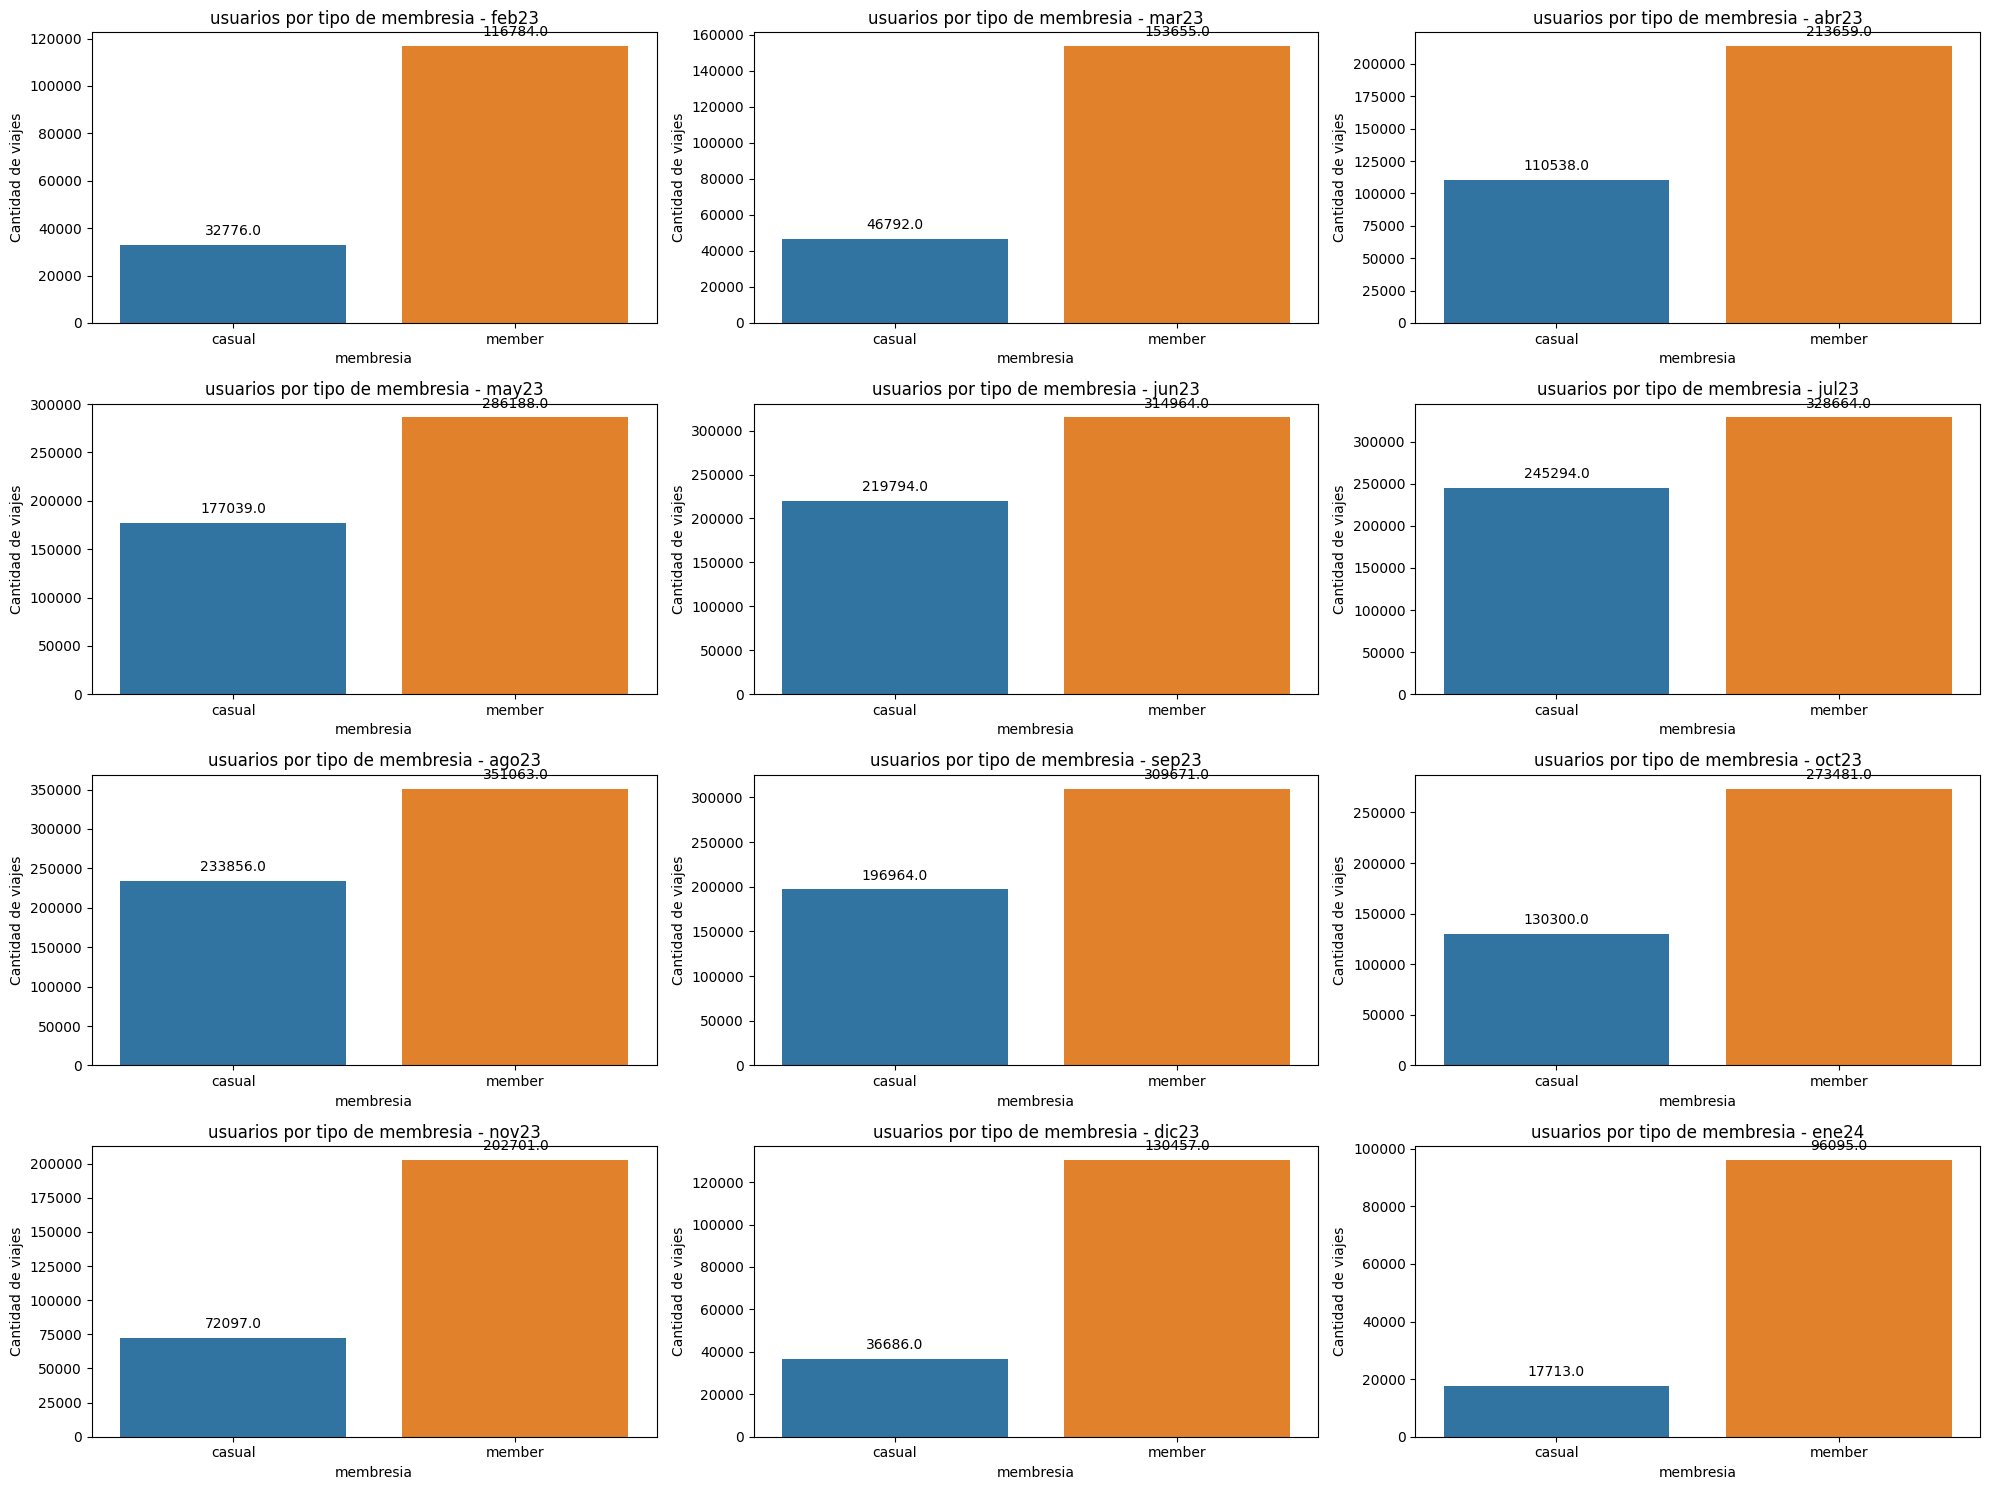

In [84]:
# Calculamos el número total de tablas para ajustar las filas y columnas de subplots
num_filas = (len(diccionario_tablas) + 2) // 3
num_columnas = min(len(diccionario_tablas), 3)

# Creamos una sola figura con múltiples subplots para todos los gráficos
fig, axs = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(20, 15))

# Iteramos sobre cada tabla y su índice en el diccionario
for i, (nombre_tabla, df) in enumerate(diccionario_tablas.items()):
    # Calcular las coordenadas del subplot actual
    fila = i // 3
    columna = i % 3

    # Crear el gráfico de barras en el subplot actual
    sns.countplot(x='member_casual', data=df, hue='member_casual', ax=axs[fila, columna])
    axs[fila, columna].set_title(f'usuarios por tipo de membresia - {nombre_tabla}')
    axs[fila, columna].set_xlabel('membresia')
    axs[fila, columna].set_ylabel('Cantidad de viajes')
        # Agregar anotaciones
    for p in axs[fila, columna].patches:
        axs[fila, columna].annotate(format(p.get_height(), '.1f'), 
                                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                                    ha='center', va='center', 
                                    xytext=(0, 10), 
                                    textcoords='offset points')
        
# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

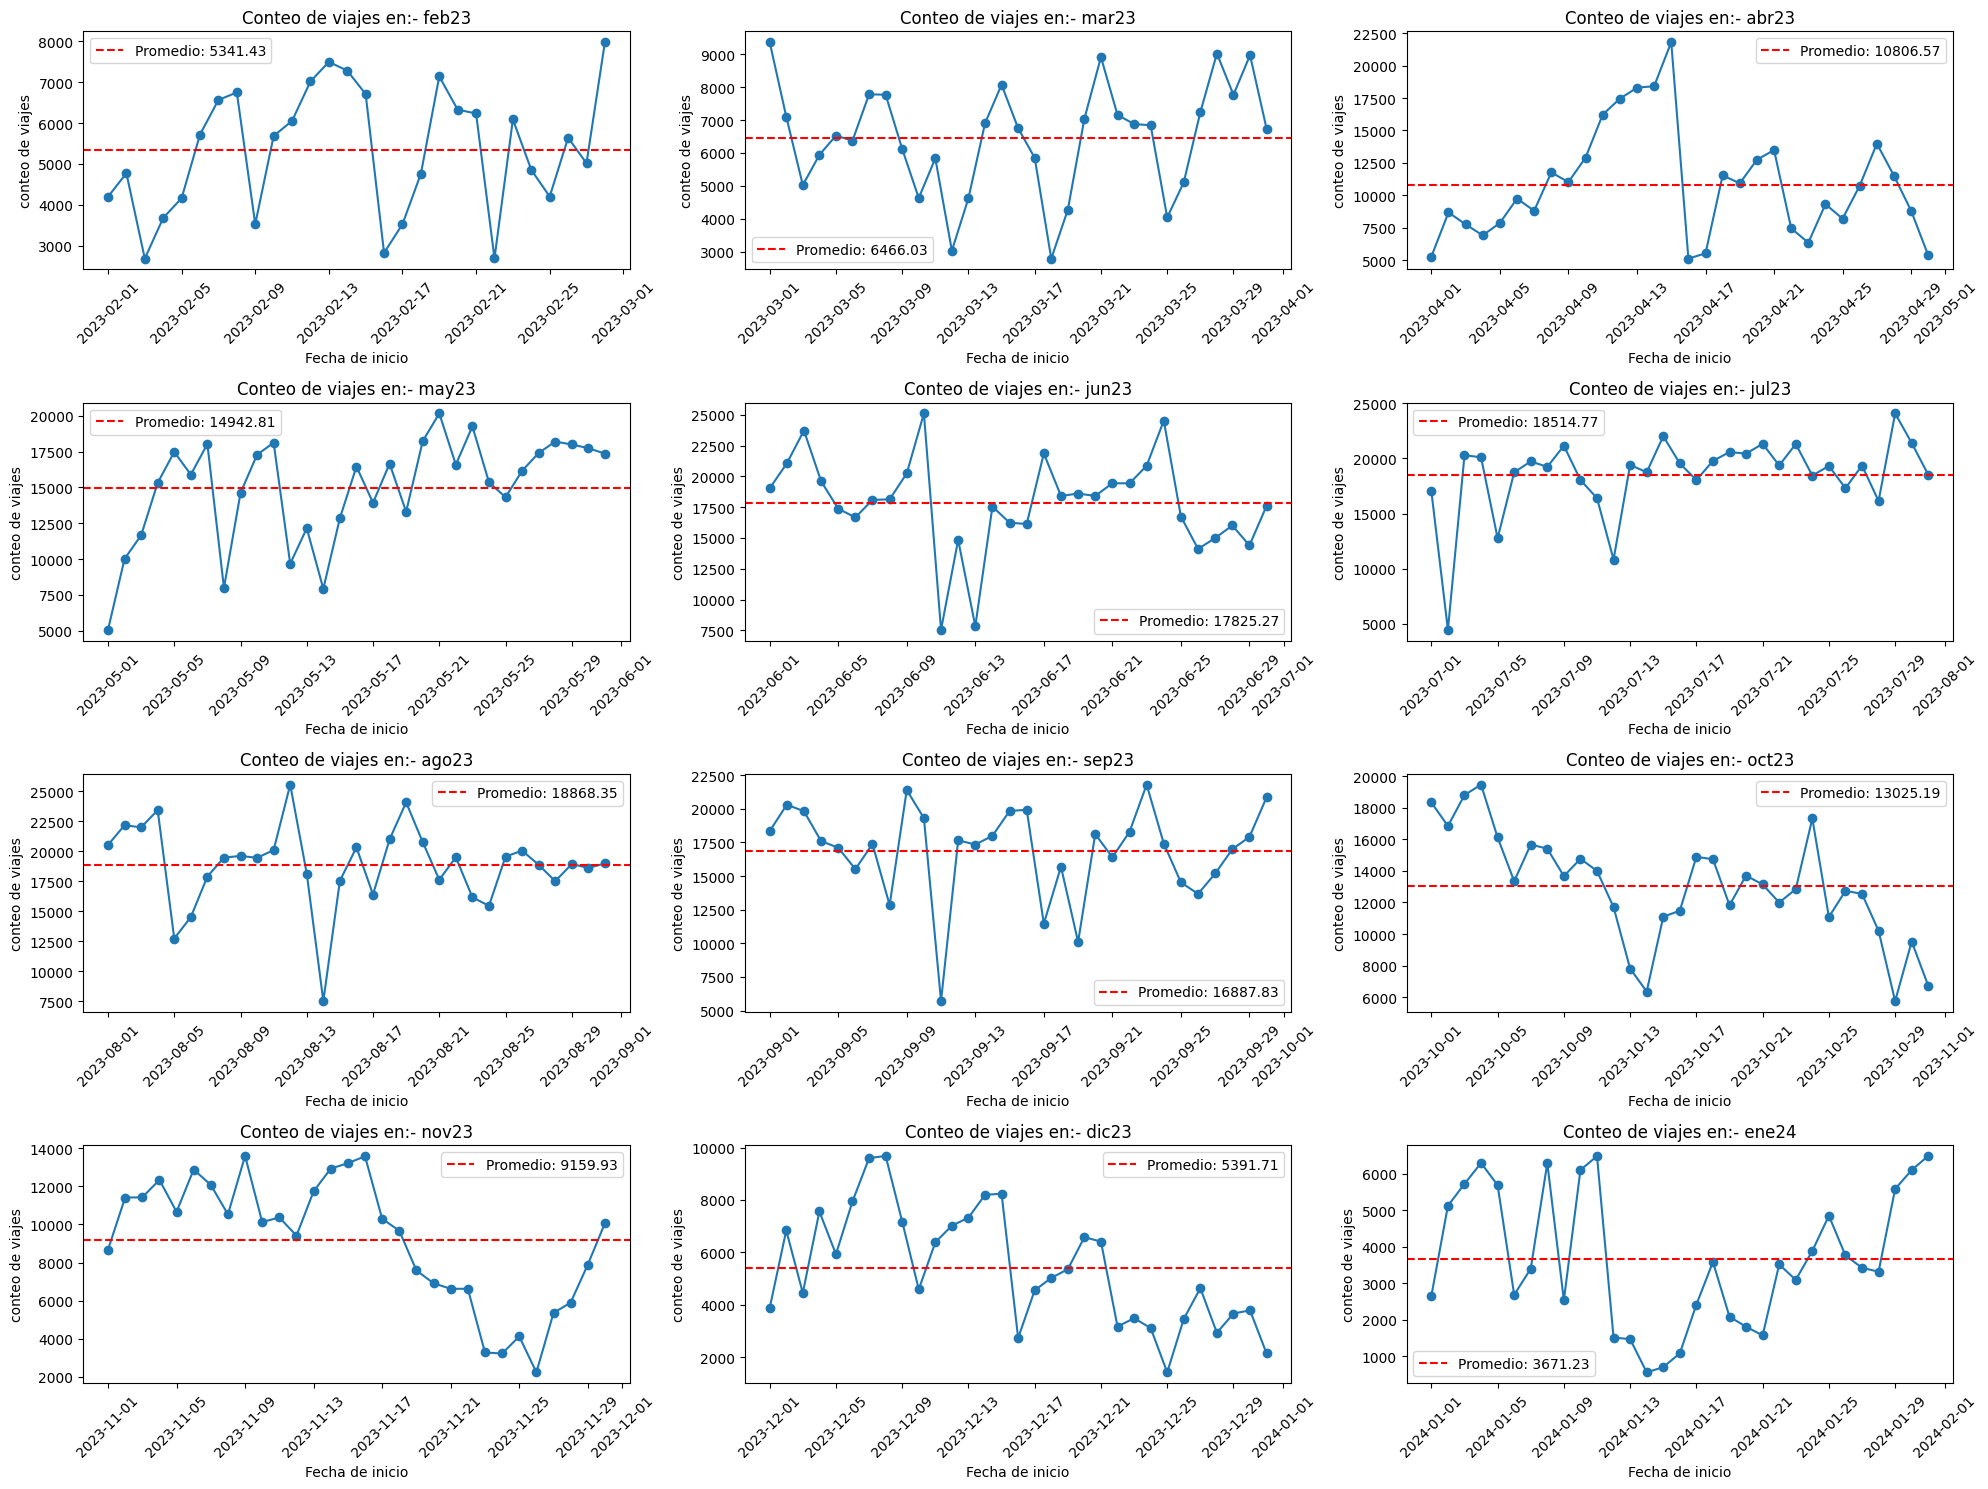

In [88]:
# Calculamos el número total de tablas para ajustar las filas y columnas de subplots
num_filas = (len(diccionario_tablas) + 2) // 3
num_columnas = min(len(diccionario_tablas), 3)

# Creamos una sola figura con múltiples subplots para todos los gráficos
fig, axs = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(20, 15))

# Iteramos sobre cada tabla y su índice en el diccionario
for i, (nombre_tabla, df) in enumerate(diccionario_tablas.items()):
    # Calcular las coordenadas del subplot actual
    fila = i // 3
    columna = i % 3

    # Convertir la columna 'started_at' a tipo datetime si aún no lo está
    df['started_at'] = pd.to_datetime(df['started_at'])
    
    # Extraer la fecha de la columna 'started_at'
    df['fecha'] = df['started_at'].dt.date
    
    # Agrupar por fecha y sumar los IDs de viaje
    suma_ids_por_fecha = df.groupby('fecha')['ride_id'].count()
    
    # Trazar el gráfico de líneas para esta tabla en el subplot actual
    axs[fila, columna].plot(suma_ids_por_fecha.index, suma_ids_por_fecha.values, marker='o')
    axs[fila, columna].set_title(f'Conteo de viajes en:- {nombre_tabla}')
    axs[fila, columna].set_xlabel('Fecha de inicio')
    axs[fila, columna].set_ylabel('conteo de viajes')
    # Rotar la escala del eje x
    axs[fila, columna].tick_params(axis='x', rotation=45)
    
    # Calcular el promedio de los conteos de viajes
    promedio = suma_ids_por_fecha.mean()
    # Agregar una línea horizontal para el promedio
    axs[fila, columna].axhline(y=promedio, color='red', linestyle='--', label=f'Promedio: {promedio:.2f}')
    axs[fila, columna].legend()
# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

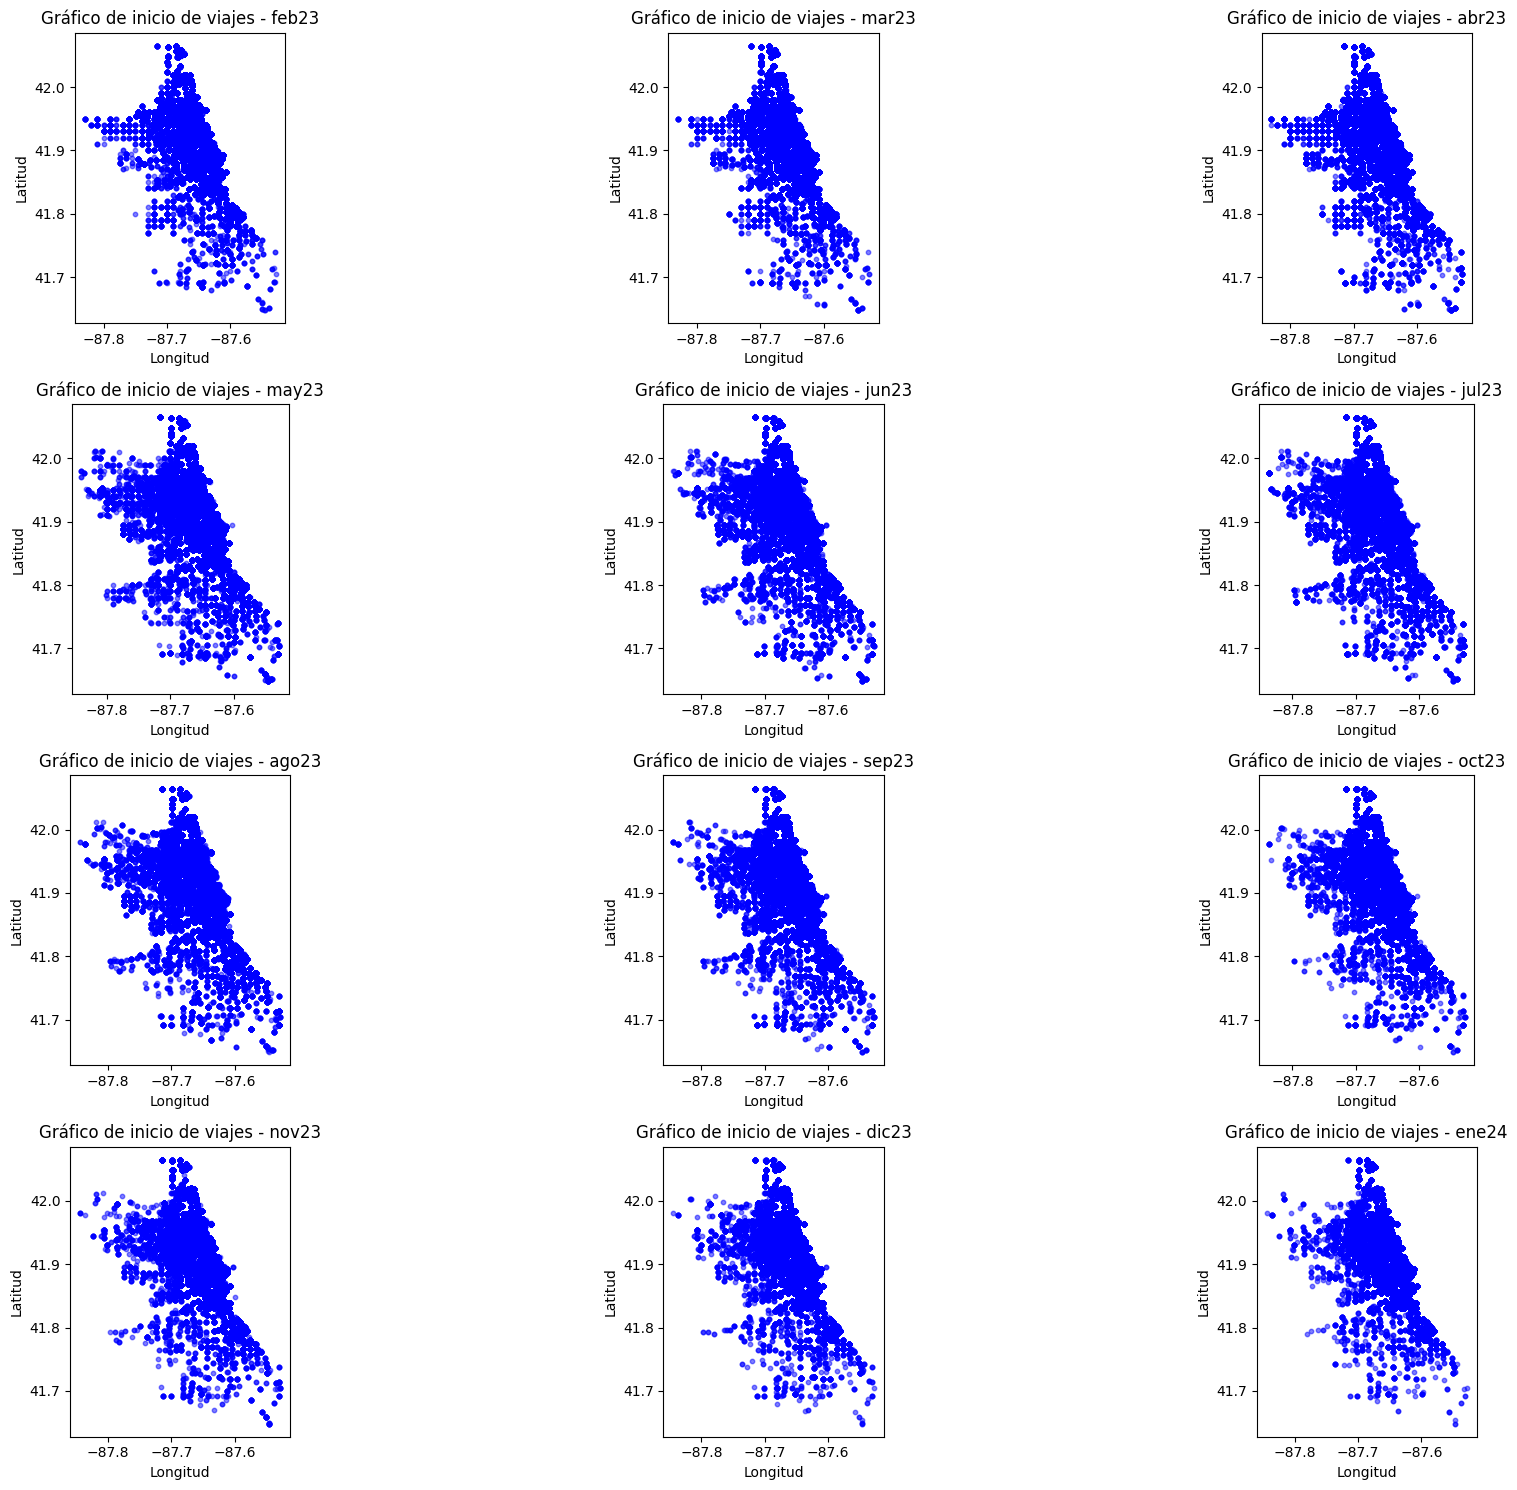

In [86]:
# Crear una figura para los gráficos
fig, axs = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(20, 15))

# Iterar sobre cada tabla y su índice en el diccionario
for i, (nombre_tabla, df) in enumerate(diccionario_tablas.items()):
    # Calcular las coordenadas del subplot actual
    fila = i // 3
    columna = i % 3
    
    # Crear una lista de objetos Point a partir de las coordenadas de latitud y longitud
    geometry = [Point(xy) for xy in zip(df['start_lng'], df['start_lat'])]
    
    # Crear un GeoDataFrame a partir de la lista de geometrías y el DataFrame original
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    
    # Graficar el GeoDataFrame en el subplot que corresponde
    gdf.plot(ax=axs[fila, columna], markersize=10, color='blue', alpha=0.5)
    axs[fila, columna].set_title(f'Gráfico de inicio de viajes - {nombre_tabla}')
    axs[fila, columna].set_xlabel('Longitud')
    axs[fila, columna].set_ylabel('Latitud')

# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()

los datos presentados en nuestos datasets son del estado de Chicago E.U se puede obervar que la densidad de los viajes fue aumentando con el paso de los meses 

In [105]:
# Crear una figura para los gráficos
fig, axs = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(20, 15))

# Iterar sobre cada tabla y su índice en el diccionario
for i, (nombre_tabla, df) in enumerate(diccionario_tablas.items()):
    # Calcular las coordenadas del subplot actual
    fila = i // 3
    columna = i % 3
    
    # Crear una lista de objetos Point a partir de las coordenadas de latitud y longitud
    geometry = [Point(xy) for xy in zip(df['start_lng'], df['start_lat'])]
    
    # Crear un GeoDataFrame a partir de la lista de geometrías y el DataFrame original
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    
    # Iterar sobre cada categoría única en la columna 'member_casual'
    for categoria in gdf['rideable_type']:
        # Filtrar el GeoDataFrame por la categoría actual
        subset = gdf[gdf['rideable_type'] == categoria]
        
        # Graficar el subconjunto de datos en el subplot actual, asignando un color único
        subset.plot(ax=axs[fila, columna], markersize=10, alpha=0.5, label=categoria)

    # Configurar la leyenda en una ubicación específica
    axs[fila, columna].legend(loc="upper right")
    axs[fila, columna].set_title(f'usabilidad de vehiculos en: {nombre_tabla}')
    axs[fila, columna].set_xlabel('Longitud')
    axs[fila, columna].set_ylabel('Latitud')


# Ajustar el espaciado entre los subplots
plt.tight_layout()
plt.show()